In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.optim import Adam, LBFGS, SGD
from torch.utils.data import Dataset, DataLoader

class LinearModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

In [2]:
x = torch.linspace(-5, 5, steps=20)
y = 2 * x + 2
x, y = x.reshape(-1, 1), y.reshape(-1, 1)

In [3]:
class MyData(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return self.x.shape[0]

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

In [4]:
# Determine if it is a cpu or a gpu
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# DataSet
my_data = MyData(x.to(device), y.to(device))

# Training parameters
criterion = nn.MSELoss()
epochs = 100

In [5]:
lm_sgd = LinearModel()
lm_sgd.to(device)
optimizer = SGD(lm_sgd.parameters(), lr=0.0001)
sgd_loss = []
for epoch in range(epochs):
    running_loss = 0.0

    for i, (x, y) in enumerate(my_data):

        x_ = Variable(x, requires_grad=True)
        y_ = Variable(y)

        # Forward pass
        y_pred = lm_sgd(x_)

        # Compute loss
        loss = criterion(y_pred, y_)

        # Zero gradients, backward pass, and update weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Update the running loss
        running_loss += loss.item()
    sgd_loss.append(running_loss)
    print(f"Epoch: {epoch + 1:02}/{epochs} Loss: {running_loss:.5e}")

Epoch: 01/100 Loss: 1.62432e+03
Epoch: 02/100 Loss: 1.51894e+03
Epoch: 03/100 Loss: 1.42098e+03
Epoch: 04/100 Loss: 1.32992e+03
Epoch: 05/100 Loss: 1.24527e+03
Epoch: 06/100 Loss: 1.16656e+03
Epoch: 07/100 Loss: 1.09339e+03
Epoch: 08/100 Loss: 1.02534e+03
Epoch: 09/100 Loss: 9.62067e+02
Epoch: 10/100 Loss: 9.03221e+02
Epoch: 11/100 Loss: 8.48491e+02
Epoch: 12/100 Loss: 7.97583e+02
Epoch: 13/100 Loss: 7.50227e+02
Epoch: 14/100 Loss: 7.06169e+02
Epoch: 15/100 Loss: 6.65176e+02
Epoch: 16/100 Loss: 6.27030e+02
Epoch: 17/100 Loss: 5.91528e+02
Epoch: 18/100 Loss: 5.58483e+02
Epoch: 19/100 Loss: 5.27721e+02
Epoch: 20/100 Loss: 4.99079e+02
Epoch: 21/100 Loss: 4.72408e+02
Epoch: 22/100 Loss: 4.47566e+02
Epoch: 23/100 Loss: 4.24425e+02
Epoch: 24/100 Loss: 4.02864e+02
Epoch: 25/100 Loss: 3.82771e+02
Epoch: 26/100 Loss: 3.64042e+02
Epoch: 27/100 Loss: 3.46580e+02
Epoch: 28/100 Loss: 3.30295e+02
Epoch: 29/100 Loss: 3.15105e+02
Epoch: 30/100 Loss: 3.00931e+02
Epoch: 31/100 Loss: 2.87702e+02
Epoch: 3

In [6]:
lm_adam = LinearModel()
lm_adam.to(device)
optimizer = Adam(lm_adam.parameters(), weight_decay=0.0001)
adam_loss = []
for epoch in range(epochs):
    running_loss = 0.0

    for i, (x, y) in enumerate(my_data):

        x_ = Variable(x, requires_grad=True)
        y_ = Variable(y)

        # Forward pass
        y_pred = lm_adam(x_)

        # Compute loss
        loss = criterion(y_pred, y_)

        # Zero gradients, backward pass, and update weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Update the running loss
        running_loss += loss.item()
    adam_loss.append(running_loss)
    print(f"Epoch: {epoch + 1:02}/{epochs} Loss: {running_loss:.5e}")

Epoch: 01/100 Loss: 4.95932e+02
Epoch: 02/100 Loss: 4.86999e+02
Epoch: 03/100 Loss: 4.78552e+02
Epoch: 04/100 Loss: 4.70345e+02
Epoch: 05/100 Loss: 4.62325e+02
Epoch: 06/100 Loss: 4.54459e+02
Epoch: 07/100 Loss: 4.46731e+02
Epoch: 08/100 Loss: 4.39131e+02
Epoch: 09/100 Loss: 4.31651e+02
Epoch: 10/100 Loss: 4.24287e+02
Epoch: 11/100 Loss: 4.17035e+02
Epoch: 12/100 Loss: 4.09892e+02
Epoch: 13/100 Loss: 4.02855e+02
Epoch: 14/100 Loss: 3.95923e+02
Epoch: 15/100 Loss: 3.89092e+02
Epoch: 16/100 Loss: 3.82362e+02
Epoch: 17/100 Loss: 3.75731e+02
Epoch: 18/100 Loss: 3.69197e+02
Epoch: 19/100 Loss: 3.62759e+02
Epoch: 20/100 Loss: 3.56416e+02
Epoch: 21/100 Loss: 3.50166e+02
Epoch: 22/100 Loss: 3.44008e+02
Epoch: 23/100 Loss: 3.37941e+02
Epoch: 24/100 Loss: 3.31963e+02
Epoch: 25/100 Loss: 3.26074e+02
Epoch: 26/100 Loss: 3.20272e+02
Epoch: 27/100 Loss: 3.14557e+02
Epoch: 28/100 Loss: 3.08927e+02
Epoch: 29/100 Loss: 3.03381e+02
Epoch: 30/100 Loss: 2.97918e+02
Epoch: 31/100 Loss: 2.92537e+02
Epoch: 3

In [7]:
lm_lbfgs = LinearModel()
lm_lbfgs.to(device)
optimizer = LBFGS(lm_lbfgs.parameters(), history_size=10, max_iter=4)
lbfgs_loss = []
for epoch in range(epochs):
    running_loss = 0.0

    for i, (x, y) in enumerate(my_data):

        x_ = Variable(x, requires_grad=True)
        y_ = Variable(y)

        def closure():
            # Zero gradients
            optimizer.zero_grad()

            # Forward pass
            y_pred = lm_lbfgs(x_)

            # Compute loss
            loss = criterion(y_pred, y_)

            # Backward pass
            loss.backward()

            return loss

        # Update weights
        optimizer.step(closure)

        # Update the running loss
        loss = closure()
        running_loss += loss.item()
    lbfgs_loss.append(running_loss)
    print(f"Epoch: {epoch + 1:02}/{epochs} Loss: {running_loss:.5e}")

Epoch: 01/100 Loss: 2.85742e+00
Epoch: 02/100 Loss: 5.55160e-04
Epoch: 03/100 Loss: 3.95409e-08
Epoch: 04/100 Loss: 3.93813e-08
Epoch: 05/100 Loss: 1.24924e-08
Epoch: 06/100 Loss: 8.16669e-10
Epoch: 07/100 Loss: 4.52872e-10
Epoch: 08/100 Loss: 4.52872e-10
Epoch: 09/100 Loss: 4.52872e-10
Epoch: 10/100 Loss: 4.52872e-10
Epoch: 11/100 Loss: 4.52872e-10
Epoch: 12/100 Loss: 4.52872e-10
Epoch: 13/100 Loss: 4.52872e-10
Epoch: 14/100 Loss: 4.52872e-10
Epoch: 15/100 Loss: 4.52872e-10
Epoch: 16/100 Loss: 4.52872e-10
Epoch: 17/100 Loss: 4.52872e-10
Epoch: 18/100 Loss: 4.52872e-10
Epoch: 19/100 Loss: 4.52872e-10
Epoch: 20/100 Loss: 4.52872e-10
Epoch: 21/100 Loss: 4.52872e-10
Epoch: 22/100 Loss: 4.52872e-10
Epoch: 23/100 Loss: 4.52872e-10
Epoch: 24/100 Loss: 4.52872e-10
Epoch: 25/100 Loss: 4.52872e-10
Epoch: 26/100 Loss: 4.52872e-10
Epoch: 27/100 Loss: 4.52872e-10
Epoch: 28/100 Loss: 4.52872e-10
Epoch: 29/100 Loss: 4.52872e-10
Epoch: 30/100 Loss: 4.52872e-10
Epoch: 31/100 Loss: 4.52872e-10
Epoch: 3

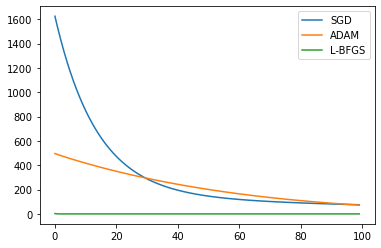

In [8]:
import matplotlib.pyplot as plt
y = range(0,100)
plt.plot(y, sgd_loss, label = "SGD")
plt.plot(y, adam_loss, label = "ADAM")
plt.plot(y, lbfgs_loss, label = "L-BFGS")
plt.legend()
plt.show()